In [65]:
import plotly.express as px
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd

# Load Data

In [67]:
df=pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [69]:
df.head(4)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424


# What is the average credit card spending per person in each city?

In [70]:
city_spending=df.groupby('City')['Amount'].mean()
print(city_spending)

City
Achalpur, India     178515.666667
Adilabad, India     176946.400000
Adityapur, India    160665.500000
Adoni, India        175039.444444
Adoor, India         92532.142857
                        ...      
Zaidpur, India      144763.600000
Zamania, India      144272.333333
Zira, India         182283.000000
Zirakpur, India     183221.000000
Zunheboto, India    155476.333333
Name: Amount, Length: 986, dtype: float64


In [71]:
city_spending = df.groupby('City')['Amount'].mean().reset_index()
#select subsets of city

top_cities = city_spending.sort_values('Amount', ascending=False).head(10)

#horizontal chart

fig = px.bar(top_cities, y='City', x='Amount', title='Average Credit Card Spending by City',
             labels={'City': 'City', 'Amount': 'Average Credit Card Spending'},
             hover_data=['Amount'], orientation='h')
fig.update_layout(updatemenus=[dict(type='dropdown', buttons=list([dict(label='All',
                                                                        method='update',
                                                                        args=[{'visible': [True]*len(top_cities)},
                                                                              {'title': 'Average Credit Card Spending by City',
                                                                               'annotations': []}])] + [
                                                                        dict(label=city,
                                                                             method='update',
                                                                             args=[{'visible': top_cities['City'] == city},
                                                                                   {'title': f'Average Credit Card Spending in {city}',
                                                                                    'annotations': []}]) for city in top_cities['City']]))])
fig.show()


# Do men or women have higher average credit card spending?

In [72]:
gender_spending = df.groupby('Gender')['Amount'].mean().reset_index()

# Create a bar chart with a slider to select the gender
fig = px.bar(gender_spending, x='Gender', y='Amount', title='Average Credit Card Spending by Gender',
             labels={'Gender': 'Gender', 'Amount': 'Average Credit Card Spending'},
             range_y=[0, max(gender_spending['Amount'])], hover_data=['Amount'])

# Add a slider to the plot
fig.update_layout(updatemenus=[dict(type='buttons', buttons=[dict(label='All',
                                                                 method='update',
                                                                 args=[{'visible': [True, True]},
                                                                       {'title': 'Average Credit Card Spending by Gender'}])])])

fig.show()

# What types of credit cards are most popular in each city?

In [73]:
card_counts = df.groupby(['City', 'Card Type'])['Amount'].count().reset_index()

# Select a subset of the cities to include in the plot
top_cities = card_counts.groupby('City')['Amount'].sum().sort_values(ascending=False).index[:10]
card_counts = card_counts[card_counts['City'].isin(top_cities)]

# Create a horizontal stacked bar chart with a dropdown menu to select the city
fig = px.bar(card_counts, y='City', x='Amount', color='Card Type', title='Credit Card Transactions by City',
             labels={'City': 'City', 'Amount': 'Number of Transactions', 'Card Type': 'Card Type'},
             hover_data=['Amount'], orientation='h')

# Add a dropdown menu to the plot
fig.update_layout(updatemenus=[dict(type='dropdown', buttons=list([dict(label='All',
                                                                        method='update',
                                                                        args=[{'visible': [True]*len(card_counts)},
                                                                              {'title': 'Credit Card Transactions by City',
                                                                               'annotations': []}])] + [
                                                                        dict(label=city,
                                                                             method='update',
                                                                             args=[{'visible': card_counts['City'] == city},
                                                                                   {'title': f'Credit Card Transactions in {city}',
                                                                                    'annotations': []}]) for city in top_cities]))])

fig.show()


# What is the overall trend in credit card spending over time plot it

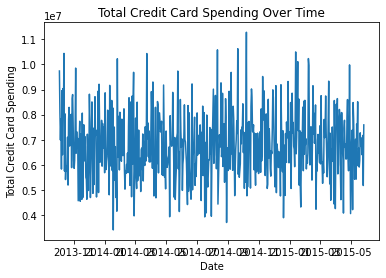

In [74]:
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and compute the total credit card spending for each date
spending_by_date = df.groupby('Date')['Amount'].sum().reset_index()

# Plot the results as a line chart
plt.plot(spending_by_date['Date'], spending_by_date['Amount'])

# Add a title and axis labels
plt.title('Total Credit Card Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Credit Card Spending')

plt.show()